# Creacion del modelo
Haremos la implementacion del modelo de ML utilizando KNN

In [3]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
# Dataframe
path_df = "dataframes/X_transformed.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
path_labels = "dataframes/labels.pickle"
with open(path_labels, 'rb') as data2:
    labels_true = pickle.load(data2)


### Encontrando el numero optimo de clusters
Para ello utilizaremos el metodo del codo 

In [6]:

distancias_cuadradas = [] #para cada k
for k in range(1,92):
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distancias_cuadradas.append(km.inertia_)

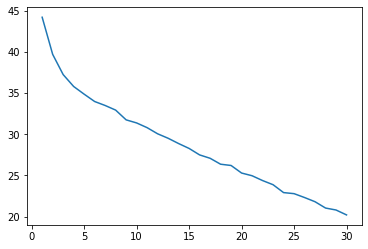

<Figure size 864x576 with 0 Axes>

In [7]:
sns.lineplot(x=range(1,31),y=distancias_cuadradas[0:30])
plt.figure(figsize=(12, 8))
plt.show()


In [8]:
# Claramente el numero de clusters es 5 xd
km = KMeans(n_clusters=6)
km = km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

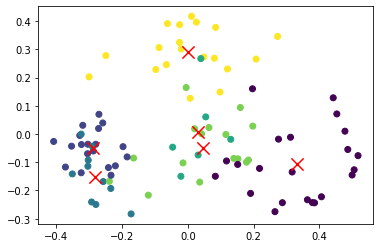

In [9]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(centroids)
plt.scatter(reduced_features[:, 0],
            reduced_features[:, 1], c=labels)
plt.scatter(reduced_cluster_centers[:, 0],
            reduced_cluster_centers[:, 1], marker='x', s=150, c='r')


In [11]:
varianza = []
for n in range(1,92):
    pca = PCA(n_components=n)
    pca.fit(df.toarray())
    varianza.append(np.sum(pca.explained_variance_ratio_))


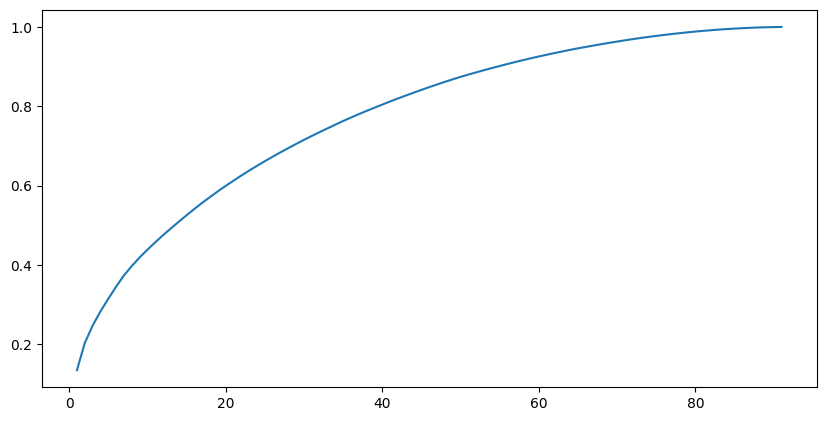

In [12]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(range(1,92),varianza)

El codo esta aproximadamente en la dimension 37, pero al estar en un punto tan bajo sigue mereciendo la pena utilizar la totalidad de las dimensiones

In [13]:
from sklearn.metrics import homogeneity_score
homogeneity_score(labels_true=labels_true, labels_pred=labels)


0.34291145854984967